In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

d = pd.read_csv("C:/Users/Avijit/Desktop/dataset/top2018 track spotify.csv")
d.tail(2)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
98,1j4kHkkpqZRBwE0A4CN4Y,Dusk Till Dawn - Radio Edit,ZAYN,0.258,0.437,11.0,-6.593,0.0,0.0390,0.101,0.000001,0.1060,0.0967,180.043,239000.0,4.0
99,3EPXxR3ImUwfayaurPi3c,Be Alright,Dean Lewis,0.553,0.586,11.0,-6.319,1.0,0.0362,0.697,0.000000,0.0813,0.4430,126.684,196373.0,4.0


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null float64
loudness            100 non-null float64
mode                100 non-null float64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null float64
time_signature      100 non-null float64
dtypes: float64(13), object(3)
memory usage: 12.6+ KB


In [22]:
c=d.corr()

In [23]:
c

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,-0.072582,-0.051759,0.015517,-0.058019,0.227075,-0.134374,-0.066592,-0.038761,0.413855,-0.195012,-0.068368,0.119421
energy,-0.072582,1.000000,-0.136345,0.732719,-0.117555,-0.073591,-0.421209,0.093684,0.050542,0.382434,0.062272,0.073017,0.255235
key,-0.051759,-0.136345,1.000000,-0.105309,-0.141568,0.019583,0.141590,-0.136607,-0.125443,-0.032622,0.003737,0.046144,-0.087096
loudness,0.015517,0.732719,-0.105309,1.000000,-0.110178,-0.252037,-0.269742,0.036248,0.000006,0.407760,-0.035156,0.265310,0.072301
mode,-0.058019,-0.117555,-0.141568,-0.110178,1.000000,-0.150076,-0.030028,0.089667,0.024428,-0.210599,-0.011911,0.055411,-0.083782
speechiness,0.227075,-0.073591,0.019583,-0.252037,-0.150076,1.000000,-0.081536,-0.069543,-0.099379,-0.051054,0.102999,-0.009856,0.235615
acousticness,-0.134374,-0.421209,0.141590,-0.269742,-0.030028,-0.081536,1.000000,-0.089583,-0.150177,-0.020800,-0.158013,-0.069627,-0.158935
instrumentalness,-0.066592,0.093684,-0.136607,0.036248,0.089667,-0.069543,-0.089583,1.000000,-0.016249,-0.095123,0.178142,-0.045873,0.011894
liveness,-0.038761,0.050542,-0.125443,0.000006,0.024428,-0.099379,-0.150177,-0.016249,1.000000,-0.042612,-0.107652,-0.042942,-0.079558
valence,0.413855,0.382434,-0.032622,0.407760,-0.210599,-0.051054,-0.020800,-0.095123,-0.042612,1.000000,-0.148423,-0.131901,0.223410


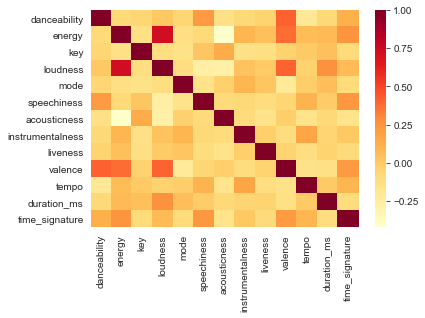

In [24]:
sns.heatmap(d.corr(),cmap="YlOrRd")

# Danceablity column analysis

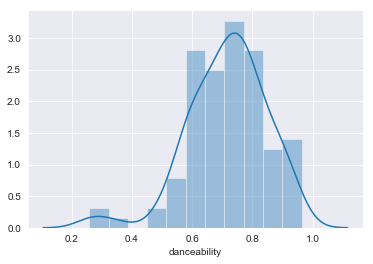

In [25]:
sns.set_style(style='darkgrid')
sns.distplot(d['danceability'],hist=True,kde=True)

# Energy Tracks

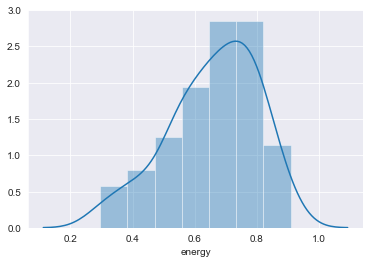

In [26]:
sns.distplot(d['energy'])

# Top 10 of the most danceable songs

In [27]:
d[['name','artists','danceability','valence','tempo']].sort_values(by='danceability',ascending=False).head(10)

,name,artists,danceability,valence,tempo
91,Yes Indeed,Lil Baby,0.964,0.562,119.958
55,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,0.931,0.376,125.978
19,Look Alive (feat. Drake),BlocBoy JB,0.922,0.595,140.022
18,Moonlight,XXXTENTACION,0.921,0.711,128.009
61,Nonstop,Drake,0.912,0.422,154.983
89,Bella,Wolfine,0.909,0.844,94.016
73,Walk It Talk It,Migos,0.909,0.406,145.905
82,HUMBLE.,Kendrick Lamar,0.908,0.421,150.011
21,Te Bot? - Remix,Nio Garcia,0.903,0.442,96.507
30,Taste (feat. Offset),Tyga,0.884,0.342,97.994


# Top 10 songs with the most energy

In [28]:
d[['name','artists','energy','valence','tempo']].sort_values(by='energy',ascending=False).head(10)

,name,artists,energy,valence,tempo
12,Nice For What,Drake,0.909,0.757,93.394
77,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",Sofia Reyes,0.895,0.794,94.968
34,?chame La Culpa,Luis Fonsi,0.889,0.649,96.024
9,FRIENDS,Marshmello,0.880,0.534,95.079
7,One Kiss (with Dua Lipa),Calvin Harris,0.862,0.592,123.994
46,Finesse (Remix) [feat. Cardi B],Bruno Mars,0.859,0.926,105.115
23,Youngblood,5 Seconds of Summer,0.854,0.152,120.274
41,Dura,Daddy Yankee,0.848,0.828,95.000
45,Jackie Chan,Ti?sto,0.834,0.687,128.005
43,Thunder,Imagine Dragons,0.822,0.288,167.997


# The artists we have here in top 100 tracks and the number of their songs made it to the top 100

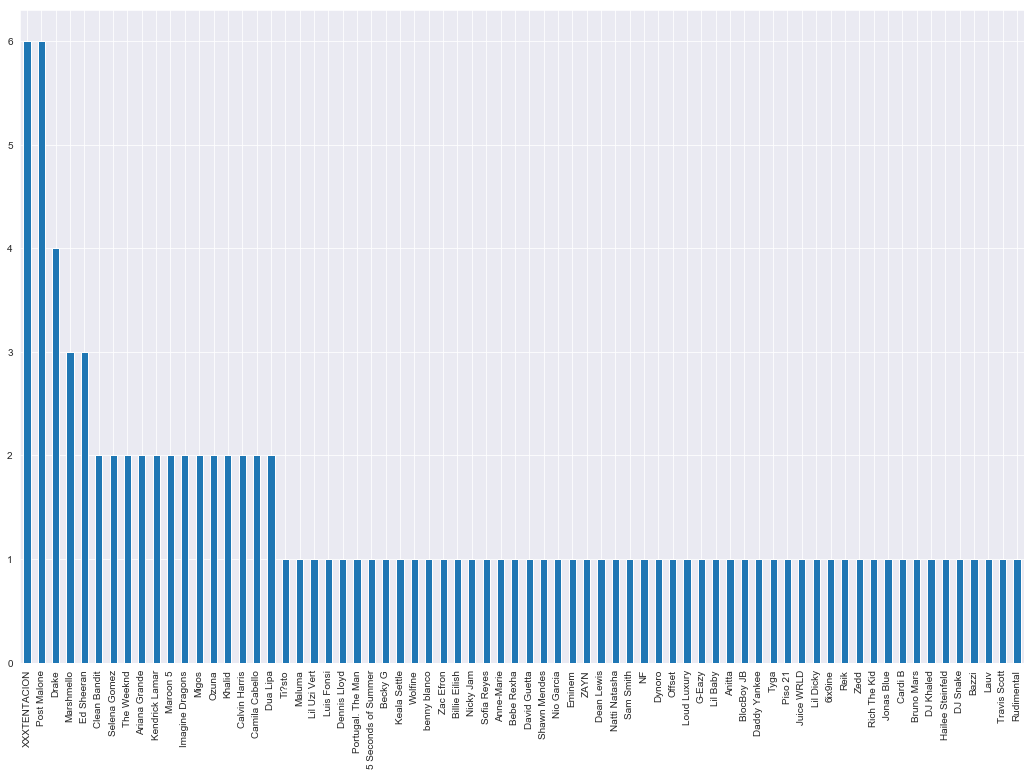

In [29]:
plt.figure(figsize=(18,12))
d['artists'].value_counts().plot.bar()

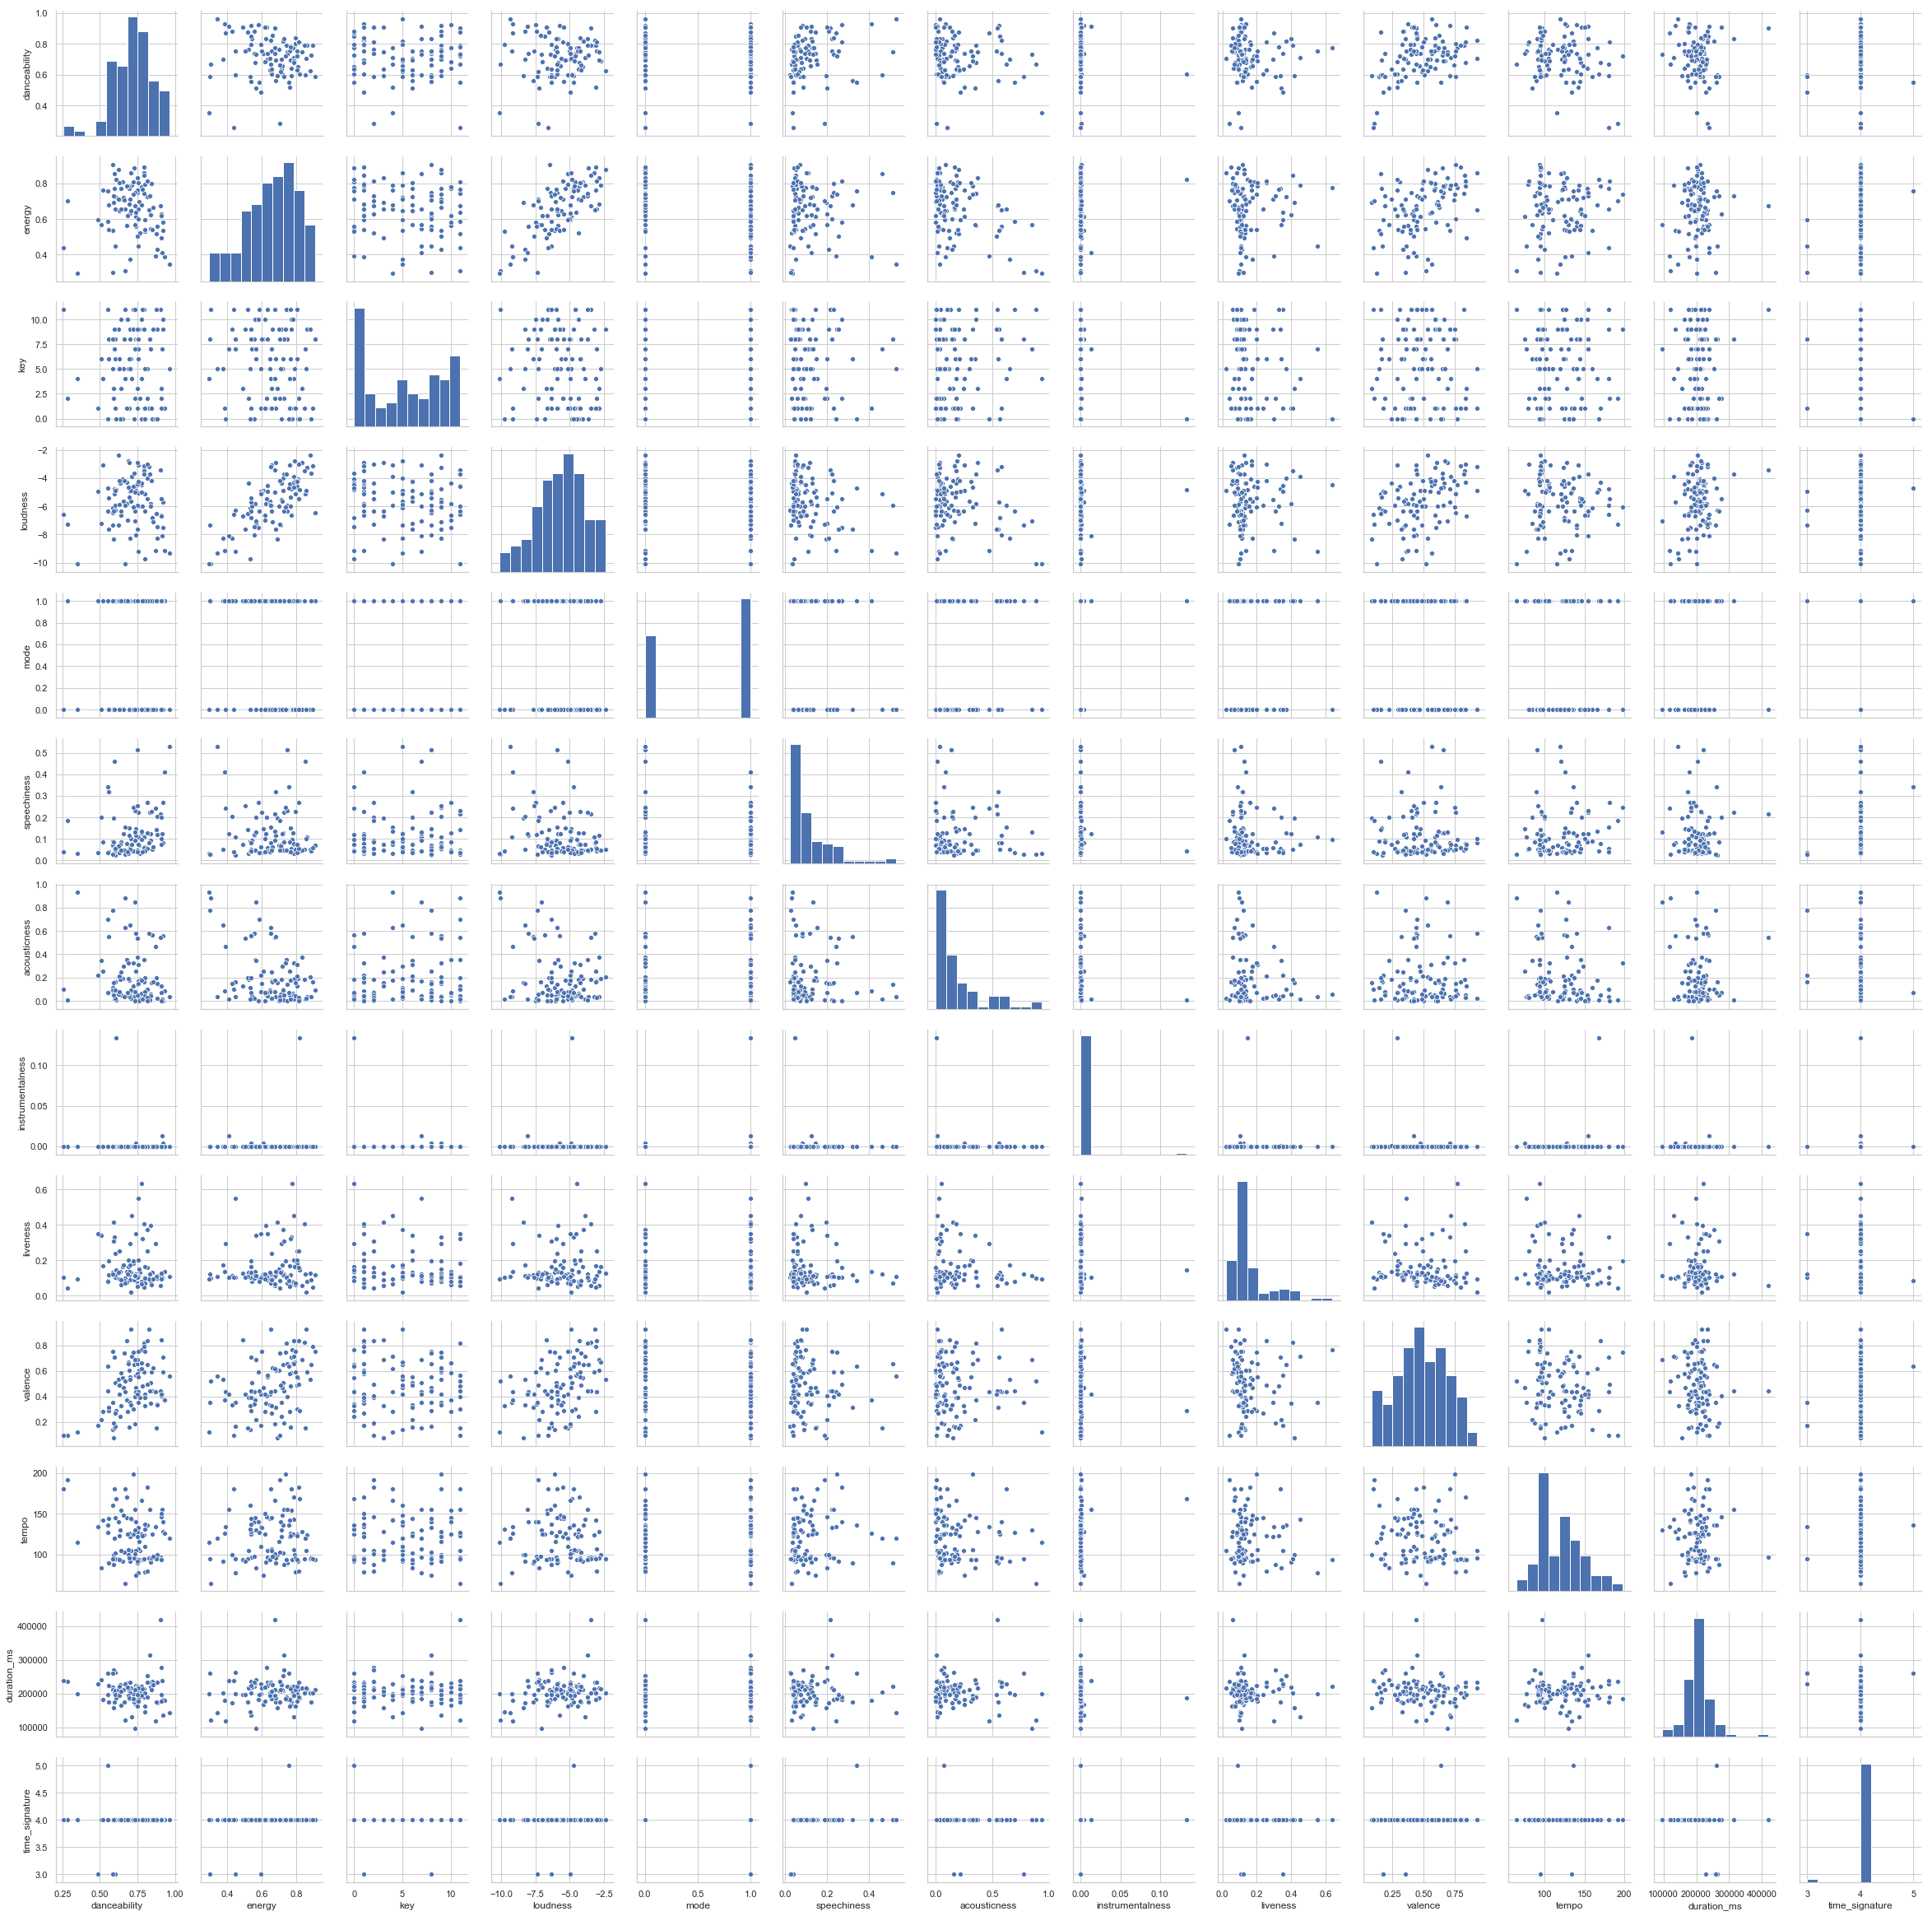

In [31]:
# scatter mattrix
sns.set(style="whitegrid")
sns.pairplot()

In [32]:
d1 = d.drop(['id','name','artists'],axis = 1)
d1.head(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.754,0.449,7.0,-9.211,1.0,0.109,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,0.740,0.613,8.0,-4.880,1.0,0.145,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0


In [33]:
d1.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,417920.000000,5.00


In [34]:
d1.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

sns.countplot(x = 'danceability', data = d);

plt.figure(figsize=(20,4)) # this creates a figure 8 inch wide, 4 inch high
sns.countplot(x = 'danceability', data = d)
plt.show()

plt.figure(figsize=(50, 50))
ax = sns.countplot(x = 'danceability', data = d)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = "right")
plt.tight_layout()
plt.show()

In [35]:
# shape of the DataFrame
d1.shape

(100, 13)

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


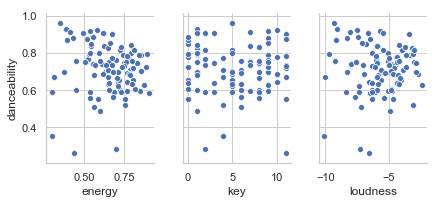

In [36]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(d1, x_vars=['energy', 'key', 'loudness'], y_vars='danceability', size=3, aspect=0.7)

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


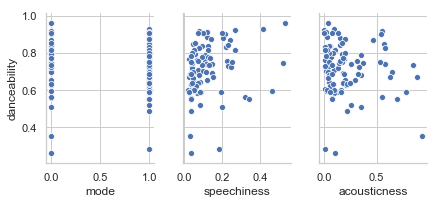

In [37]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(d1, x_vars=['mode', 'speechiness','acousticness'], y_vars='danceability', size=3, aspect=0.7)

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


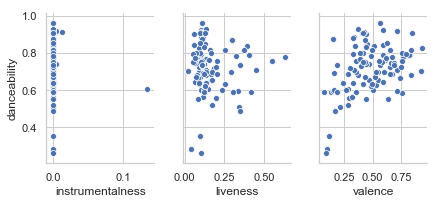

In [38]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(d1, x_vars=['instrumentalness', 'liveness', 'valence'], y_vars='danceability', size=3, aspect=0.7)

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


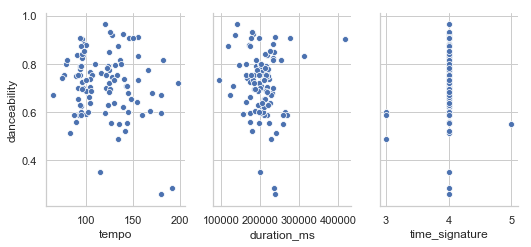

In [39]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(d1, x_vars=['tempo','duration_ms', 'time_signature'], y_vars='danceability', size=3.6, aspect=0.7)

In [40]:
x = d1.drop('danceability', axis=1)
y = d1['danceability']

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
'''print("training x---->\n",x_train.head())
print("training y---->\n",y_train.head())
print("testing x---->\n",x_test.head())
print("testing y---->\n",y_test.head())'''

'print("training x---->\n",x_train.head())\nprint("training y---->\n",y_train.head())\nprint("testing x---->\n",x_test.head())\nprint("testing y---->\n",y_test.head())'

# Linear Regression Model

In [42]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
print(reg.intercept_)         #c
print(reg.coef_)             #m

1.1449040636372367
[-3.78440197e-01 -1.67503631e-03 -4.03988610e-04  1.58500324e-02
  2.27262095e-01 -1.80068912e-01  3.17244275e-01  6.94760692e-03
  3.27201558e-01 -9.92740282e-04 -7.75123660e-07 -1.67741593e-02]


In [44]:
y_pred = reg.predict(x_test)
print(y_pred)

[0.70828782 0.64358494 0.77506551 0.78992245 0.67440898 0.6054612
 0.66081083 0.77311642 0.70141818 0.64207498 0.48165784 0.75050219
 0.82221795 0.78281478 0.72157291 0.66192402 0.73201998 0.61585285
 0.6203006  0.7948344 ]


df = pd.DataFrame({'actual':y_test,'pred':y_pred,'Error':y_test-y_pred})
df

In [45]:
import numpy as np
from sklearn import metrics as mt
print(mt.mean_absolute_error(y_test,y_pred))
print(mt.mean_squared_error(y_test,y_pred))
print(np.sqrt(mt.mean_squared_error(y_test,y_pred)))

0.10742120829021935
0.02068310844206436
0.1438162314972283


In [46]:
print('Accuracy = ',1 - mt.mean_absolute_error(y_test,y_pred))

Accuracy =  0.8925787917097806
